In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
dataset = tf.keras.utils.get_file(
    fname='imdb.tar.gz',
    origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract=True
)

84131840/84125825 [==============================] - 2s 0us/step


In [3]:
def directory_data(directory):
  data = {}
  data['reviews'] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), 'r') as file:
      data['reviews'].append(file.read())

  return pd.DataFrame.from_dict(data)

In [4]:
def data(directory):
  pos_df = directory_data(os.path.join(directory, 'pos'))
  neg_df = directory_data(os.path.join(directory, 'neg'))
  pos_df['sentiment'] = 1
  neg_df['sentiment'] = 0

  return pd.concat([pos_df, neg_df])

In [5]:
train_df = data(os.path.join(os.path.dirname(dataset), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(dataset), 'aclImdb', 'test'))

In [6]:
train_df.head()

,reviews,sentiment
0,Love the TV show. Was hooked first time I saw ...,1
1,Watched both parts twice. Enjoyed the story an...,1
2,"Made only ten years after the actual events, a...",1
3,Dev Anand (or Prashant) and Zeenat Aman ( Jasb...,1
4,Witty and disgusting. Brash and intelligent. B...,1


In [7]:
reviews = list(train_df['reviews'])

In [8]:
# 문자열 저장 list를 tokenizing
tokenized_reviews = [r.split() for r in reviews]

# tokenizing된 list에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# tokenizing된 것에 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

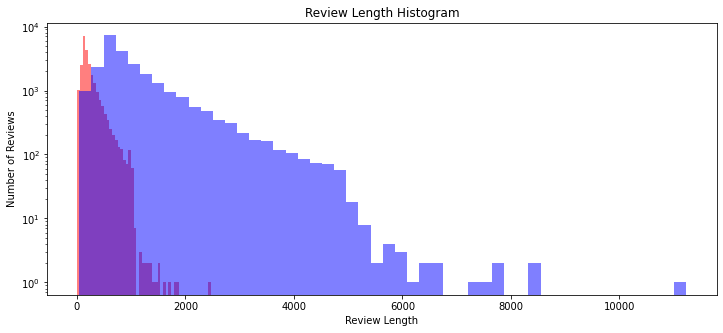

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

"""
bins:  히스토그램 값에 대한 버킷 범위
alpha: 그래프 색상 투명도
"""

plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

# 이상치(outliers) 값을 확인할 수 있다.

In [10]:
import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {:.2f}'.format(np.median(review_len_by_token)))

# 사분위에 대한 경우는 0~100 스케일로 되어 있다.
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.00
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fb3e75d2ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb3e75dd5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3e75e5400>],
 'means': [<matplotlib.lines.Line2D at 0x7fb3e75e50b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3e75ddcf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb3e75d2eb8>,
  <matplotlib.lines.Line2D at 0x7fb3e75dd278>]}

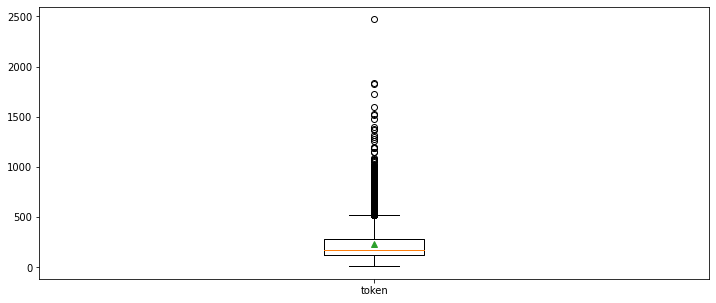

In [11]:
# 문장 내 단어의 수를 나타내는 boxplot
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb3e7d68be0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb3e7fcf400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3e7fb6588>],
 'means': [<matplotlib.lines.Line2D at 0x7fb3e7f37f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3e7fc3a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb3e7d685f8>,
  <matplotlib.lines.Line2D at 0x7fb3e7d68f60>]}

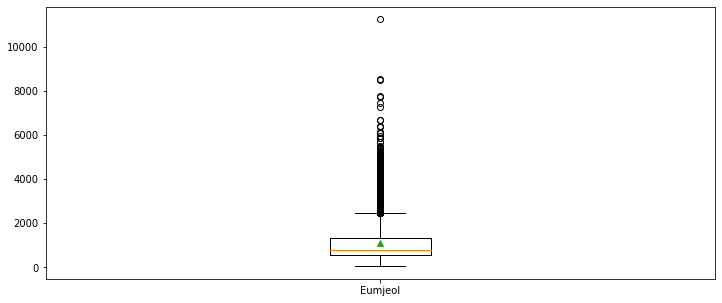

In [12]:
# 문장의 alphabet 개수를 나타내는 boxplot
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol], labels=['Eumjeol'], showmeans=True)

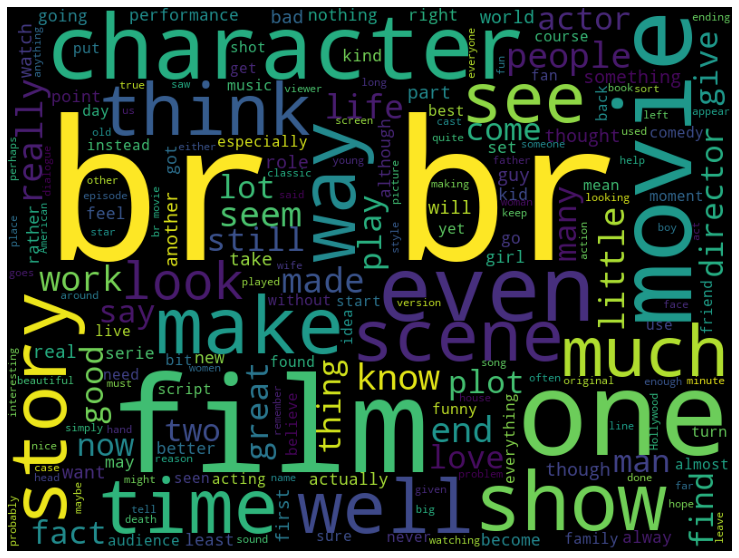

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# br이 엄청 큰 이유는 data에 <br>과 같은 html tag가 많기 때문

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=800,
                      height=600).generate(' '.join(train_df['reviews']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


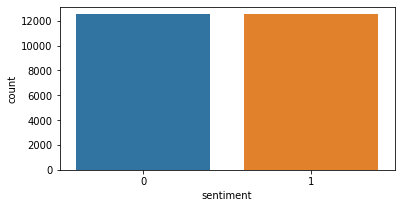

In [15]:
# 긍정, 부정의 분포 확인

import seaborn as sns

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])